In [38]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [5]:
train_path = 'dog_cat/training_set'
valid_path = 'dog_cat/test_set'

In [6]:
folders = glob('dog_cat/training_set/*')
folders

['dog_cat/training_set\\cats', 'dog_cat/training_set\\dogs']

In [11]:
inception_model = Sequential()

pretrained_model=  InceptionV3(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

inception_model.add(pretrained_model)
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dense(2, activation='softmax'))

In [12]:
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 module_wrapper_3 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_5 (ModuleWr  (None, 2)                 1026      
 apper)                                                          
                                                                 
Total params: 22852898 (87.18 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 21802784 (83.17 MB)
________

In [31]:
inception_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     r'C:\Users\Yuvraj Pardeshi\Downloads\dog_cat\train',
#     seed=123,
#     shuffle=True,
#     image_size=(224,224),
#     batch_size=32
# )


img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r'C:\Users\Yuvraj Pardeshi\Downloads\dog_cat\train',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 557 files belonging to 2 classes.


In [33]:
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     r'C:\Users\Yuvraj Pardeshi\Downloads\dog_cat\test',
#     seed=123,
#     shuffle=True,
#     image_size=(224,224),
#     batch_size=32
# )

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r'C:\Users\Yuvraj Pardeshi\Downloads\dog_cat\test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 140 files belonging to 2 classes.


In [34]:
epochs=10
history = inception_model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 36s 5s/step - loss: 38.0960 - accuracy: 0.4500 - val_loss: 25.8574 - val_accuracy: 0.5571
Epoch 2/10
5/5 [==============================] - 18s 4s/step - loss: 18.7897 - accuracy: 0.5786 - val_loss: 7.1934 - val_accuracy: 0.6500
Epoch 3/10
5/5 [==============================] - 18s 4s/step - loss: 10.0445 - accuracy: 0.6143 - val_loss: 5.9045 - val_accuracy: 0.6500
Epoch 4/10
5/5 [==============================] - 18s 4s/step - loss: 7.7823 - accuracy: 0.6071 - val_loss: 6.9840 - val_accuracy: 0.6571
Epoch 5/10
5/5 [==============================] - 24s 5s/step - loss: 4.7479 - accuracy: 0.6357 - val_loss: 1.8321 - val_accuracy: 0.7714
Epoch 6/10
5/5 [==============================] - 24s 5s/step - loss: 3.5398 - accuracy: 0.7214 - val_loss: 4.1042 - val_accuracy: 0.6286
Epoch 7/10
5/5 [==============================] - 18s 4s/step - loss: 3.5102 - accuracy: 0.6500 - val_loss: 1.4253 - val_accuracy: 0.7929
Epoch 8/10
5/5 [==============

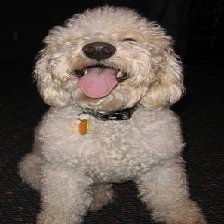

In [77]:
img=image.load_img(r'C:\Users\Yuvraj Pardeshi\Documents\sample_project_1\Deep_Learning_Assignments\dog.jpg',target_size=(224,224))
img

In [70]:
x=image.img_to_array(img)
x

array([[[ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 4.,  4.,  4.],
        [ 4.,  4.,  4.],
        [ 3.,  3.,  3.]],

       [[ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 4.,  4.,  4.],
        [ 4.,  4.,  4.],
        [ 2.,  2.,  2.]],

       [[ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 2.,  2.,  2.],
        [ 3.,  3.,  3.],
        [ 2.,  2.,  2.]],

       ...,

       [[15., 13., 14.],
        [16., 14., 15.],
        [21., 19., 20.],
        ...,
        [10., 10.,  8.],
        [14., 14., 12.],
        [12., 12., 10.]],

       [[25., 23., 24.],
        [24., 22., 23.],
        [27., 25., 26.],
        ...,
        [20., 20., 18.],
        [20., 20., 18.],
        [18., 18., 16.]],

       [[28., 26., 27.],
        [24., 22., 23.],
        [19., 17., 18.],
        ...,
        [17., 19., 16.],
        [12., 14., 11.],
        [ 9., 11.,  8.]]

In [71]:
x = x/255
x

array([[[0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.05882353, 0.05098039, 0.05490196],
        [0.0627451 , 0.05490196, 0.05882353],
        [0.08235294, 0

In [72]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [73]:
pred = inception_model.predict(img_data)
pred

1/1 [==============================] - 0s 178ms/step


array([[0.45522916, 0.54477084]], dtype=float32)

In [66]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [67]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is dogs
